# **What factors sell a car?**
You are an analyst at Crankshaft List. Hundreds of free vehicle ads are displayed on company websites every day. So, you are tasked with studying data that has been collected over the last few years to determine the factors that influence the price of a vehicle.

## Pre-processing

[Load the libraries you think are needed for this project. You will probably realize that you need additional libraries as you work on the project and that is normal. However, make sure to update this section if needed, OK?]

[Load the libraries you think are needed for this project. You will probably realize that you need additional libraries as you work on the project and that is normal.

In [1]:
# Load all libraries
import pandas as pd
import matplotlib.pyplot as plt

### Loading Data

[Load this project data and read the general information.]

In [2]:
# Load the data file into a DataFrame
data = pd.read_csv('/datasets/vehicles_us.csv')


### Mengeksplorasi Data Awal

### Exploring Initial Data

The dataset you have contains the following columns:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — vehicle mileage when the ad was shown
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — date the ad was posted
- `days_listed` — number of days the ad was shown until it was removed
  
[Understand the columns, explore the data so you are familiar with the data you have.]

In [3]:
# show general information/summary about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# show sample data
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


General information:
1. The dataframe has 51,525 entries and 13 columns.
2. Some columns still have missing values (model_year, cylinders, odometer, paint_color, is_4wd).

Variable Interrelationship:
It is necessary to identify whether there is a link or correlation between certain variables (for example, price and vehicle age, price and mileage) to guide further analysis.

It is necessary to pre-process the data to address missing values and make necessary data type changes. Additionally, further exploratory analysis will help understand patterns and relationships in this dataset, especially related to factors influencing vehicle prices

There is an incompatible data type

The is_4wd column also has the float64 data type. This data type should be a boolean data type (True/False) because this variable is a binary variable that indicates whether the vehicle has 4 wheel drive or not. We will address this in the data pre-processing process.

The date_posted column has a string (object) data type, it would be better if it was changed to a datetime data type to facilitate date-based analysis.

There are missing values in some columns. From the information provided, some columns have missing values, but not all columns have missing values.

The column containing the most missing values is is_4wd, where most entries are missing information on whether the vehicle has 4-wheel drive or not.

### Conclusion and Next Steps

The initial data has several issues that need to be addressed. There are columns with missing values, especially the is_4wd column which has many missing values.

The next step:

1. Resolved missing values in 'odometer', 'cylinder', 'model_year', 'paint_color' columns
2. Change the data type in column 'is_4wd' and fill in the missing values
3. Analyze outliers if necessary.
4. Conduct exploratory analysis to understand the factors that influence vehicle prices.

## Addressing Lost Values

Column 'type'

In [5]:
# display all unique values in column 'type'
data['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [6]:
# makes all string values in the 'type' column lowercase
data['type'] = data['type'].str.lower()

In [7]:
# display all unique values in column 'type'
data['type'].unique()

array(['suv', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

Column 'odometer'

In [8]:
# displays a numeric description of the 'odometer' column
data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

With a high standard deviation, we tend to use the median. However, we cannot simply replace the missing values with the median here because the mileage depends on the model year and condition of the car. So we have to fill in the missing 'odometer' values with the median based on the model year and condition. We can group the data by 'model_year' and 'condition' and calculate the median mileage of each combination of values. Then we can apply a function that checks our data rows for missing odometer values. When it finds one, it checks the model year and condition and then returns the median odometer value for the model year/condition combination from our grouped data

In [9]:
# Calculates general odometer median
general_median_odometer = data['odometer'].median()

# Calculates median odometer based on 'model_year' and 'condition'
median_odometer_by_year_condition = data.groupby(['model_year', 'condition'])['odometer'].median()

# Function to fill missing values in 'odometer' column with appropriate median
def fillna_odometer(row):
     year = row['model_year']
     condition = row['condition']
    
     if pd.notnull(row['odometer']):
         return row['odometer']
     elif (year, condition) in median_odometer_by_year_condition.index:
         return median_odometer_by_year_condition.loc[year, condition]
     else:
         return general_median_odometer

# Fill in missing values in the 'odometer' column with the appropriate median
data['odometer'] = data.apply(fillna_odometer, axis=1)

# Check if there are still missing values in the 'odometer' column
missing_odometer = data['odometer'].isnull().sum()

print('Number of missing values in the odometer after filling:', missing_odometer)

Number of missing values in the odometer after filling: 7


Column 'cylinder'

In [10]:
# displays a numeric description of the 'cylinders' column
data['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Once again we will use the median. But keep in mind that the number of cylinders depends on the car model. We will apply the same principle as we did with the odometer column

In [11]:
# Calculates the median number of cylinders in general
general_median_cylinders = data['cylinders'].median()

# Calculates the median number of cylinders based on 'model_year' and 'condition'
median_cylinders_by_year_condition = data.groupby(['model_year', 'condition'])['cylinders'].median()

# Function to fill missing values in the 'cylinders' column with the appropriate median
def fillna_cylinders(row):
     year = row['model_year']
     condition = row['condition']
    
     if pd.notnull(row['cylinders']):
         return row['cylinders']
     elif (year, condition) in median_cylinders_by_year_condition.index:
         return median_cylinders_by_year_condition.loc[year, condition]
     else:
         return general_median_cylinders

# Fill in missing values in the 'cylinders' column with the appropriate median
data['cylinders'] = data.apply(fillna_cylinders, axis=1)

# Check if there are still missing values in the 'cylinders' column
missing_cylinders = data['cylinders'].isnull().sum()

print('Number of missing values in cylinders after filling:', missing_cylinders)

Number of missing values in cylinders after filling: 8


Column 'model_year'

In [12]:
# displays a numeric description of the 'model_year' column
data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

We will still use the median. The model year can be inferred from the model and condition. The odometer may be perfect, but the values are not categorical. We will apply the same principles as with the cylinder and odometer

In [13]:
# Calculates the median model year in general
general_median_model_year = data['model_year'].median()

# Calculates median model year based on 'model' and 'condition'
median_model_year_by_model_condition = data.groupby(['model', 'condition'])['model_year'].median()

# Function to fill missing values in column 'model_year' with appropriate median
def fillna_model_year(row):
     model = row['model']
     condition = row['condition']
    
     if pd.notnull(row['model_year']):
         return row['model_year']
     elif (model, condition) in median_model_year_by_model_condition.index:
         return median_model_year_by_model_condition.loc[model, condition]
     else:
         return general_median_model_year

# Fill in missing values in the 'model_year' column with the appropriate median
data['model_year'] = data.apply(fillna_model_year, axis=1)

# Check if there are still missing values in the 'model_year' column
missing_model_year = data['model_year'].isnull().sum()

print('Number of missing values in model_year after filling:', missing_model_year)

Number of missing values in model_year after filling: 6


Column 'paint color'

In [14]:
# displays all unique values in the 'paint color' column
data['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [15]:
# count the number of unique values
data['paint_color'].value_counts()

paint_color
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

In [16]:
# count the number of nan values in the 'paint_color' column
data['paint_color'].isna().sum()

9267

Column 'paint_color'
This column is categorical and there is no other data that we can use as a reference to fill in the data in this column. In this case, the NaN value will remain

*To delete or not to delete?*
This is usually the point where we decide to delete rows or columns with NaN values. However, there is an interesting case we are working on. Removing NaN rows would seriously harm the results of our Exploratory Data Analysis because they carry other important values that we also really need for our analysis. Deleting thousands of rows like that would not be beneficial. So we'll let those rows be, NaN values and all. The NaN value will not affect the process that we will apply to the column where it is located.

Conclusion
We have changed the column to the appropriate type, we tried to fill in the missing values in the model_year, paint_color, cylinder and odometer values but not all NaNs can be lost. So we decided to keep it so that our results would not be skewed

## Fixed Data Type

Changed the 'is_4wd' data type to boolean

In [17]:
data['is_4wd'].unique()

array([ 1., nan])

In [18]:
# Replace non-1 values with 0 in the is_4wd column
data['is_4wd'] = data['is_4wd'].where(data['is_4wd'] == 1, 0)

# Change the data type of the is_4wd column to boolean
data['is_4wd'] = data['is_4wd'].astype('bool')

# Check unique values after changes
data['is_4wd'].unique()

array([ True, False])

In [19]:
#Show duplicates in column form
print(data[data.duplicated()])
print('\n--------------------------------------------- \n')
# Check for duplicates
print("Number of duplicates:", data.duplicated().sum())

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []

--------------------------------------------- 

Number of duplicates: 0


## Improve Data Quality

[Add additional factors to the data to make your analysis easier.]

In [20]:
# Add time and date values when the ad is displayed

# Change the data type of the date_posted column to datetime
data['date_posted'] = pd.to_datetime(data['date_posted'])

# Extract time and date information
data['day_of_week'] = data['date_posted'].dt.dayofweek # Day of week (0: Monday, 6: Sunday)
data['month'] = data['date_posted'].dt.month # Month (1: January, 12: December)
data['year'] = data['date_posted'].dt.year # Year

# Display data after adding time and date information
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,5,6,2018
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,4,3,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019


In [21]:
# Add the age of the vehicle when the ad is displayed
data['vehicle_age_at_posting'] = data['year'] - data['model_year']

# Show data after adding vehicle age
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age_at_posting
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,5,6,2018,7.0
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,10.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,4,3,2019,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2.0


In [22]:
# Change the value 0 to 1
data['vehicle_age_at_posting'] = data['vehicle_age_at_posting'].replace(0, 1)

In [23]:
# Add the average vehicle mileage per year
data['average_mileage_per_year'] = data['odometer'] / data['vehicle_age_at_posting']

# Display data after adding the average vehicle mileage per year
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age_at_posting,average_mileage_per_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,5,6,2018,7.0,20714.285714
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,10.0,8870.500000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,4,3,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2.0,40451.500000


In [24]:
data.describe()

,price,model_year,cylinders,odometer,date_posted,days_listed,day_of_week,month,year,vehicle_age_at_posting,average_mileage_per_year
count,51525.000000,51519.000000,51517.000000,51518.000000,51525,51525.00000,51525.000000,51525.000000,51525.000000,51519.00000,51512.000000
mean,12132.464920,2009.786098,6.119630,115188.118774,2018-10-25 01:57:46.270742528,39.55476,3.005434,6.628491,2018.307462,8.56319,17798.960883
min,1.000000,1908.000000,3.000000,0.000000,2018-05-01 00:00:00,0.00000,0.000000,1.000000,2018.000000,1.00000,0.000000
25%,5000.000000,2006.000000,4.000000,73280.000000,2018-07-29 00:00:00,19.00000,1.000000,3.000000,2018.000000,4.00000,10866.666667
50%,9000.000000,2011.000000,6.000000,113423.000000,2018-10-25 00:00:00,33.00000,3.000000,7.000000,2018.000000,7.00000,15181.818182
75%,16839.000000,2014.000000,8.000000,152315.000000,2019-01-21 00:00:00,53.00000,5.000000,10.000000,2019.000000,12.00000,21262.000000
max,375000.000000,2019.000000,12.000000,990000.000000,2019-04-19 00:00:00,271.00000,6.000000,12.000000,2019.000000,110.00000,373200.000000
std,10040.803015,6.129896,1.578016,62152.221003,NaN,28.20427,1.997759,3.474134,0.461447,6.08858,12617.725409


In [25]:
# It might help to replace the value in the 'condition' column with something that can be manipulated more easily

# Replace the values in the 'condition' column with a numeric scale
condition_mapping = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}
data['condition'] = data['condition'].map(condition_mapping)

# Check unique values after changes
data['condition'].unique()

array([2, 4, 1, 3, 0, 5], dtype=int64)

## Checking Clean Data

In [26]:
# show general information/summary about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     51525 non-null  int64         
 1   model_year                51519 non-null  float64       
 2   model                     51525 non-null  object        
 3   condition                 51525 non-null  int64         
 4   cylinders                 51517 non-null  float64       
 5   fuel                      51525 non-null  object        
 6   odometer                  51518 non-null  float64       
 7   transmission              51525 non-null  object        
 8   type                      51525 non-null  object        
 9   paint_color               42258 non-null  object        
 10  is_4wd                    51525 non-null  bool          
 11  date_posted               51525 non-null  datetime64[ns]
 12  days_listed       

In [27]:
# show sample data
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age_at_posting,average_mileage_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,5,6,2018,7.0,20714.285714
1,25500,2008.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,10.0,8870.500000
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,4,3,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2.0,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,4,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,2,10,2018,5.0,17627.200000
51521,2700,2002.0,honda civic,0,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,2,11,2018,16.0,11343.750000
51522,3950,2009.0,hyundai sonata,3,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,3,11,2018,9.0,14222.222222
51523,7455,2013.0,toyota corolla,2,4.0,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,0,7,2018,5.0,27914.600000


## Mempelajari Parameter Inti 
[Pilih pendekatan yang tepat untuk mempelajari parameter di bawah ini, perhatikan bagaimana outlier memengaruhi bentuk dan kemudahan pembacaan histogram.]
- Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

## Study Core Parameters
[Choose the correct approach to studying the parameters below, noting how outliers affect the shape and readability of the histogram.]
- The parameters are
- Price
- Vehicle age when the ad is displayed
- Mileage
- Number of cylinders
- Condition

[Kalau kamu merasa perlu mengulangi pekerjaan yang sama beberapa kali, yuk coba pikirkan instrumen pengodean apa yang bisa berguna untuk menghindari penduplikasian kodemu.]

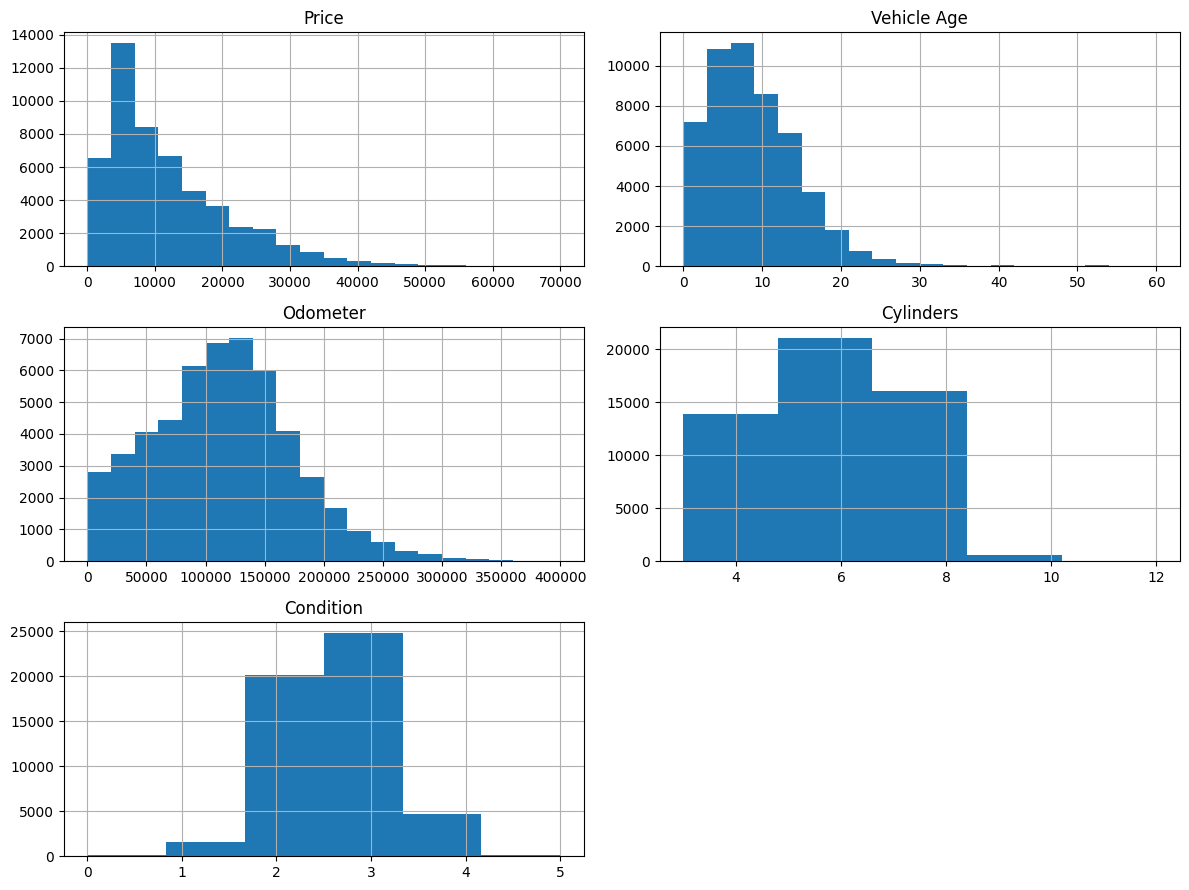

In [28]:
def plot_histogram(data, column, num_bins, x_range, position, title):
     plt.subplot(3, 2, position)
     data[column].hist(bins=num_bins, range=x_range)
     plt.title(title)

# Split the image window into a 3x2 grid
plt.figure(figsize=(12, 9))

# Plot the histogram above
plot_histogram(data, 'price', 20, (0, 70000), 1, 'Price')
plot_histogram(data, 'vehicle_age_at_posting', 20, (0, 60), 2, 'Vehicle Age')

# Histogram plot below
plot_histogram(data, 'odometer', 20, (0, 400000), 3, 'Odometer')
plot_histogram(data, 'cylinders', 5, None, 4, 'Cylinders')
plot_histogram(data, 'condition', 6, None, 5, 'Condition')

# Displays a histogram
plt.tight_layout()
plt.show()

Conclusion
1. The 'price' histogram, bins start to focus and form a wide bottom after 40,000.
2. Histogram 'vehicle_age_at_posting', the same thing happens after age 30.
3. The 'odometer' histogram, we start to notice the tails after 250,000.
4. There are no obvious outliers in the other histograms

## Study and Handle Outliers

[Based on the results above, determine what columns may contain outliers and create a DataFrame without them]

In [29]:
# Determine the lower limit of outliers
# Determine the upper limit of outliers

In [30]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound for outliers 'price':", lower_bound)
print("Upper bound for outliers 'price':", upper_bound)

Lower bound for outliers 'price': -12758.5
Upper bound for outliers 'price': 34597.5


In [31]:
Q1 = data['vehicle_age_at_posting'].quantile(0.25)
Q3 = data['vehicle_age_at_posting'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound for outliers 'vehicle_age_at_posting':", lower_bound)
print("Upper bound for outliers 'vehicle_age_at_posting':", upper_bound)

Lower bound for outliers 'vehicle_age_at_posting': -8.0
Upper bound for outliers 'vehicle_age_at_posting': 24.0


In [32]:
Q1 = data['odometer'].quantile(0.25)
Q3 = data['odometer'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound for 'odometer' outliers:", lower_bound)
print("Upper bound for 'odometer' outliers:", upper_bound)

Lower bound for 'odometer' outliers: -45272.5
Upper bound for 'odometer' outliers: 270867.5


In [33]:
# create a piece of data that costs more than 34597.5, age more than 24, and
# odometer over 270867.5
outlier_data = data.query('price > 34597.5 & vehicle_age_at_posting > 24 & odometer > 270867.5')

# general information about the dataframe
outlier_data.info(verbose=True)

# First 5 rows of dataframe
outlier_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 17869 to 17869
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     1 non-null      int64         
 1   model_year                1 non-null      float64       
 2   model                     1 non-null      object        
 3   condition                 1 non-null      int64         
 4   cylinders                 1 non-null      float64       
 5   fuel                      1 non-null      object        
 6   odometer                  1 non-null      float64       
 7   transmission              1 non-null      object        
 8   type                      1 non-null      object        
 9   paint_color               1 non-null      object        
 10  is_4wd                    1 non-null      bool          
 11  date_posted               1 non-null      datetime64[ns]
 12  days_listed            

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age_at_posting,average_mileage_per_year
17869,59900,1964.0,chevrolet corvette,4,8.0,gas,990000.0,automatic,convertible,red,False,2018-06-17,28,6,6,2018,54.0,18333.333333


In [34]:
# Store data without outliers in a separate DataFrame

# create a piece of data that costs less than 34597.5, age less than 24, and
# odometer less than 270867.5
filtered_data = data.query('price < 34597.5 & vehicle_age_at_posting < 24 & odometer < 270867.5')

# general information about the dataframe
filtered_data.info(verbose=True)

# First 5 rows of dataframe
filtered_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 48387 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     48387 non-null  int64         
 1   model_year                48387 non-null  float64       
 2   model                     48387 non-null  object        
 3   condition                 48387 non-null  int64         
 4   cylinders                 48385 non-null  float64       
 5   fuel                      48387 non-null  object        
 6   odometer                  48387 non-null  float64       
 7   transmission              48387 non-null  object        
 8   type                      48387 non-null  object        
 9   paint_color               39676 non-null  object        
 10  is_4wd                    48387 non-null  bool          
 11  date_posted               48387 non-null  datetime64[ns]
 12  days_listed            

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age_at_posting,average_mileage_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,5,6,2018,7.0,20714.285714
1,25500,2008.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,10.0,8870.500000
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,4,3,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2.0,40451.500000


## Learn Core Parameters Without Outliers

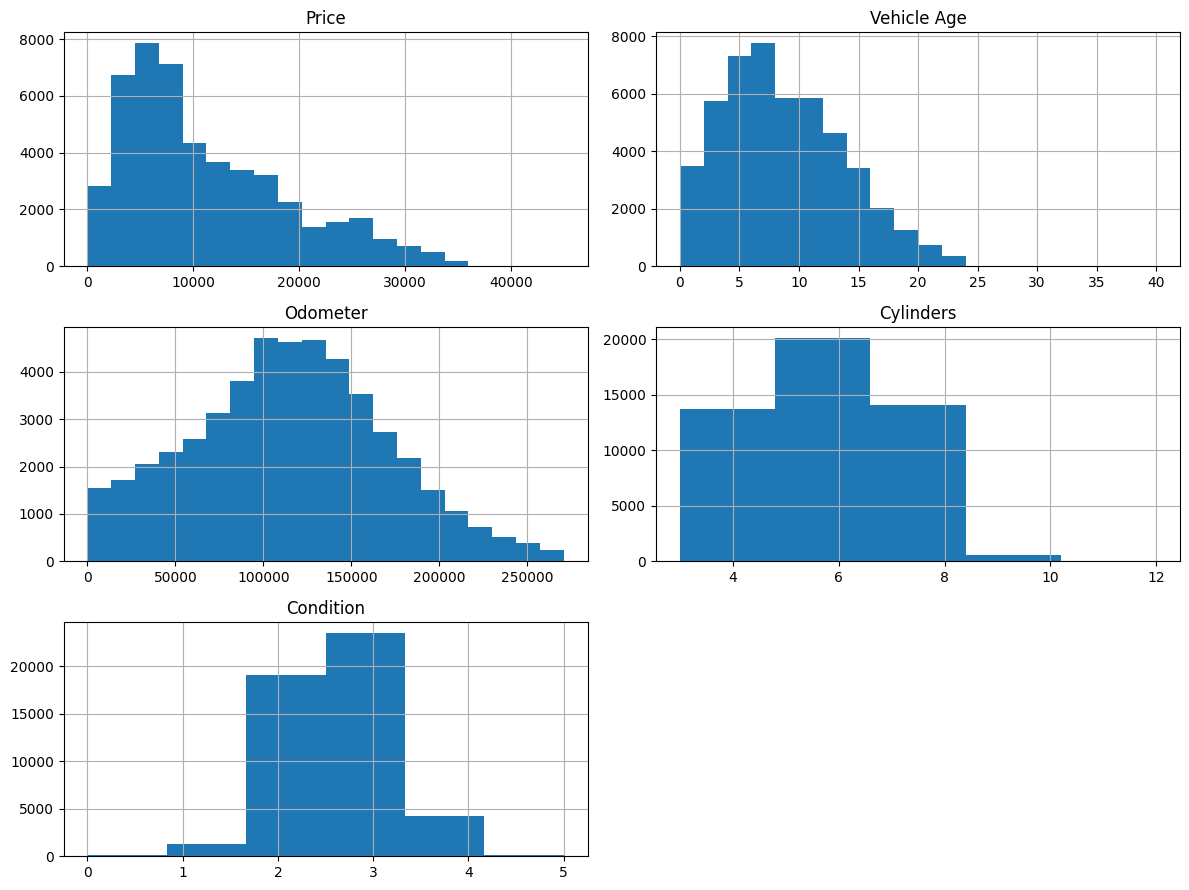

In [35]:
def plot_histogram(data, column, num_bins, x_range, title, position):
     plt.subplot(3, 2, position)
     data[column].hist(bins=num_bins, range=x_range)
     plt.title(title)

# Split the image window into a 3x2 grid
plt.figure(figsize=(12, 9))

# Plot the histogram above
plot_histogram(filtered_data, 'price', 20, (0, 45000), 'Price', 1)
plot_histogram(filtered_data, 'vehicle_age_at_posting', 20, (0, 40), 'Vehicle Age', 2)

# Histogram plot below
plot_histogram(filtered_data, 'odometer', 20, None, 'Odometer', 3)
plot_histogram(filtered_data, 'cylinders', 5, None, 'Cylinders', 4)
plot_histogram(filtered_data, 'condition', 6, None, 'Condition', 5)

# Displays a histogram
plt.tight_layout()
plt.show()

The new 'price' histogram peaked at 5000, after which there was a steady decline although there was a second smaller peak at around 25000. The 'vehicle_age_at_posting' histogram peaked at 6, after which there was a steady decline although there was a second peak at 10. At new 'odometer' histogram, peak around 125000; the minor peak this time occurs earlier at 100000. The main difference between the 'price', 'vehicle_age_at_posting', and 'odometer' of filtered_data and the original dataset is that the newer histogram has more noise because it deals with a more limited set of values. The tail is also gone. But they have the same peak.

## Ad Validity Period

In [36]:
filtered_data['days_listed'].describe()

count    48387.000000
mean        39.536342
std         28.206958
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

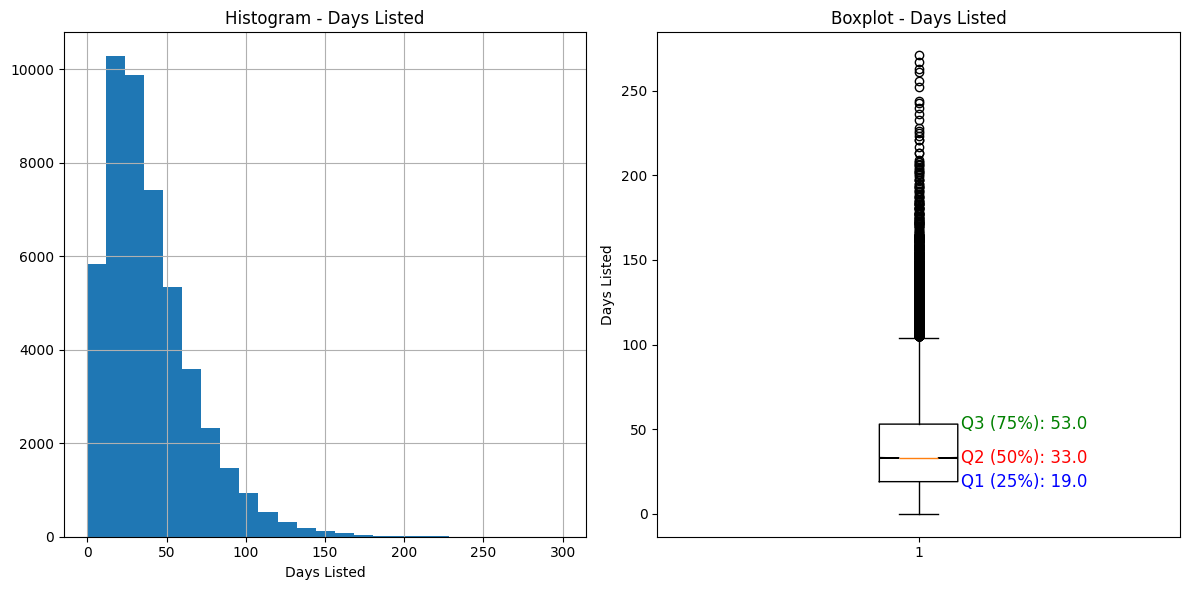

In [37]:
# Split the image window into two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram plot on the left
filtered_data['days_listed'].hist(bins=25, range=(0, 300), ax=ax1)
ax1.set_title('Histogram - Days Listed')
ax1.set_xlabel('Days Listed')

# Plot the boxplot on the right with the y-axis
ax2.boxplot(filtered_data['days_listed'], vert=True, notch=True)
ax2.set_title('Boxplot - Days Listed')
ax2.set_ylabel('Days Listed')

# Calculates Q1, Q2 (median), and Q3
q_values = [25, 50, 75] # Percentile values for Q1, Q2 (median), and Q3
percentiles = [filtered_data['days_listed'].quantile(q / 100) for q in q_values]

# Displays the values Q1, Q2, and Q3 in the boxplot with different colors
colors = ['b', 'r', 'g'] # Colors Q1 (blue), Q2 (red), and Q3 (green)
for i, (percentile, color) in enumerate(zip(percentiles, colors)):
     ax2.text(1, percentile, f'        Q{i+1} ({q_values[i]}%): {percentile}', fontsize=12, ha='left', va='center', color=color )

# Displays histograms and boxplots
plt.tight_layout()
plt.show()

Typically advertising lasts between 19 and about 50 days. Anything abnormally long means more than 100 days. Numbers between 0 and 19 can be considered removed too quickly.

## Average Price of Each Type of Vehicle

In [38]:
# Calculates the number of ads for each type of vehicle
ad_counts_per_type = filtered_data['type'].value_counts()

# Calculates the average price for each type of vehicle
average_price_per_type = filtered_data.groupby('type')['price'].mean()

# Combines information on the number of advertisements and average price per vehicle type
merged_data = pd.concat([ad_counts_per_type, average_price_per_type], axis=1)
merged_data.columns = ['ads', 'average_price']
merged_data = merged_data.sort_values(by='ads', ascending=False)

# Displays results in order from largest to smallest based on the number of ads
print(merged_data)

               ads  average_price
type                             
sedan        12025    6973.301954
suv          11917   10444.356549
truck        11120   15135.258993
pickup        6303   15051.084087
coupe         2008   13545.911853
wagon         1506    8975.517928
mini-van      1147    8046.564080
hatchback     1005    6838.702488
van            584    8820.914384
convertible    336   13083.898810
other          233   10542.137339
offroad        182   14344.049451
bus             21   18107.428571


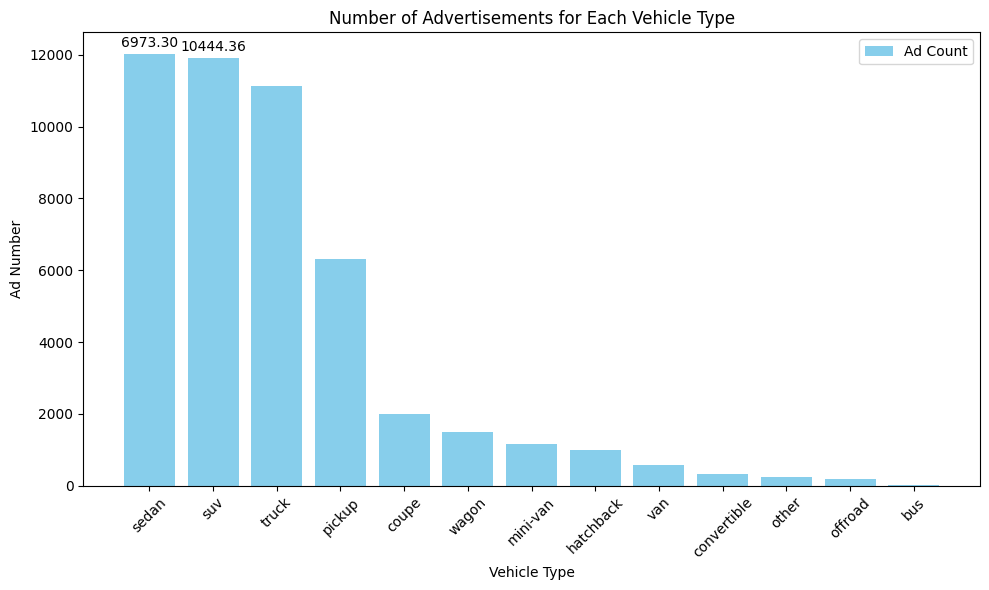

In [39]:
# Select the two types of vehicles with the highest number of advertisements
top_2_types = ad_counts_per_type.nlargest(2)

# Fetch only data for the top two vehicle types
data_top_types = filtered_data[filtered_data['type'].isin(top_2_types.index)]

# Create a graph to show the dependence of the number of ads on the type of vehicle
plt.figure(figsize=(10, 6))
plt.bar(ad_counts_per_type.index, ad_counts_per_type.values, color='skyblue', label='Ad Count')
plt.xlabel('Vehicle Type')
plt.ylabel('Ad Number')
plt.title('Number of Advertisements for Each Vehicle Type')
plt.xticks(rotation=45)
plt.legend()

# Show average price for each vehicle type
for i, type_name in enumerate(top_2_types.index):
     avg_price = average_price_per_type[type_name]
     plt.text(i, ad_counts_per_type[type_name] + 200, f'{avg_price:.2f}', ha='center')

plt.tight_layout()
plt.show()

## Price Factor

First place "sedan"

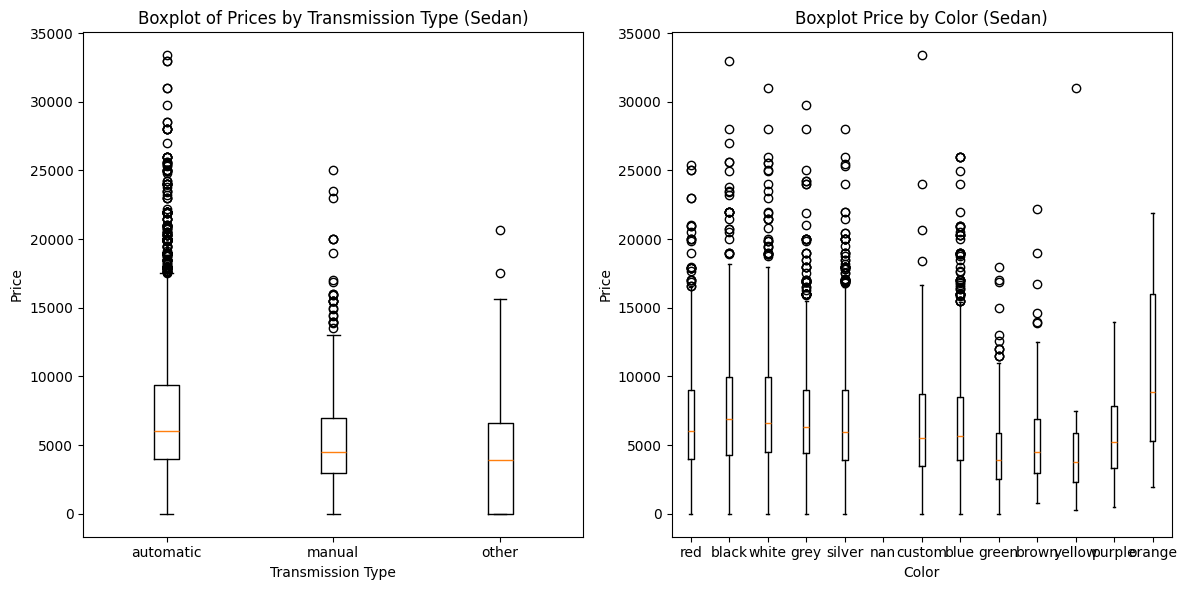

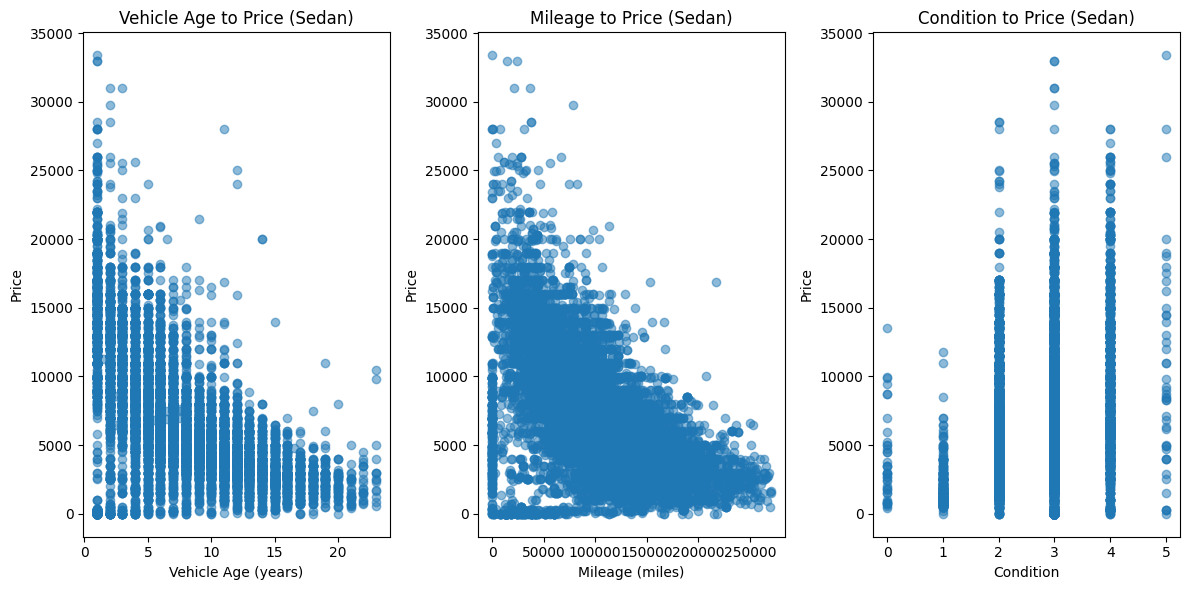

In [40]:
# Data for Sedan vehicle types
sedan_data = filtered_data[filtered_data['type'] == 'sedan']

# Boxplot for transmission type and color against price
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for transmission_type in sedan_data['transmission'].unique():
     data = sedan_data[sedan_data['transmission'] == transmission_type]['price']
     plt.boxplot(data, positions=[sedan_data['transmission'].unique().tolist().index(transmission_type)])
plt.xticks(range(len(sedan_data['transmission'].unique())), sedan_data['transmission'].unique())
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.title('Boxplot of Prices by Transmission Type (Sedan)')

plt.subplot(1, 2, 2)
for color in sedan_data['paint_color'].unique():
     data = sedan_data[sedan_data['paint_color'] == color]['price']
     plt.boxplot(data, positions=[sedan_data['paint_color'].unique().tolist().index(color)])
plt.xticks(range(len(sedan_data['paint_color'].unique())), sedan_data['paint_color'].unique())
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('Boxplot Price by Color (Sedan)')

plt.tight_layout()
plt.show()

# Scatter plot for vehicle age, mileage, and condition against price
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(sedan_data['vehicle_age_at_posting'], sedan_data['price'], alpha=0.5)
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Price')
plt.title('Vehicle Age to Price (Sedan)')

plt.subplot(1, 3, 2)
plt.scatter(sedan_data['odometer'], sedan_data['price'], alpha=0.5)
plt.xlabel('Mileage (miles)')
plt.ylabel('Price')
plt.title('Mileage to Price (Sedan)')

plt.subplot(1, 3, 3)
plt.scatter(sedan_data['condition'], sedan_data['price'], alpha=0.5)
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Condition to Price (Sedan)')

plt.tight_layout()
plt.show()

                        vehicle_age_at_posting  odometer  condition     price
vehicle_age_at_posting                1.000000  0.621270  -0.317644 -0.617709
odometer                              0.621270  1.000000  -0.339503 -0.563409
condition                            -0.317644 -0.339503   1.000000  0.294022
price                                -0.617709 -0.563409   0.294022  1.000000


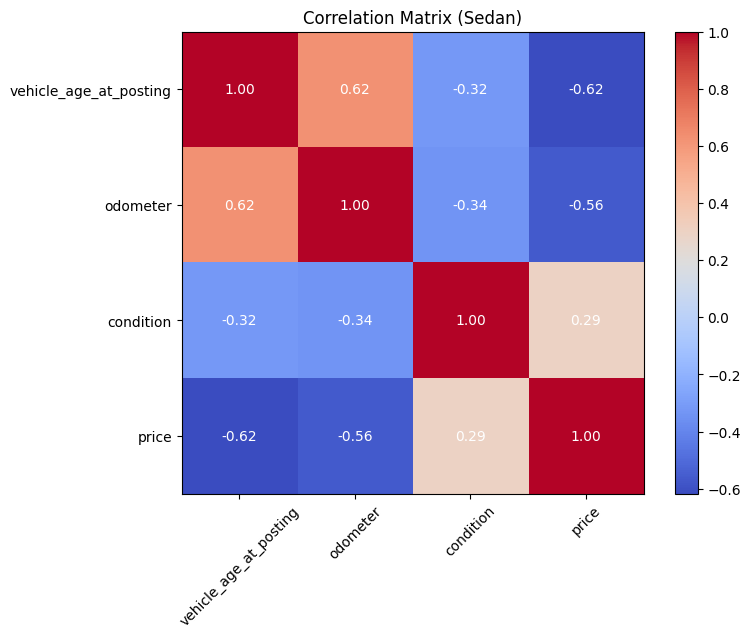

In [41]:
# Retrieve the required columns
sedan_corr_data = sedan_data[['vehicle_age_at_posting', 'odometer', 'condition', 'price']]

# Correlation Matrix
correlation_matrix = sedan_corr_data.corr()
print(correlation_matrix)

# Correlation plot using heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Matrix (Sedan)')
plt.colorbar()

# Add labels to the axes
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)

# Displays the correlation value on the heatmap
for i in range(len(correlation_matrix)):
     for j in range(len(correlation_matrix)):
         plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()

Based on the correlation matrix for the vehicle type "sedan", we have the following information:

Vehicle Age: The correlation between vehicle age and price is -0.62, which shows a fairly strong negative relationship. This means that the older the vehicle, the lower the price tends to be.

Mileage (Odometer): The correlation between mileage (odometer) and price is -0.56, indicating a fairly strong negative relationship. This means the higher the mileage, the lower the price tends to be.

Vehicle Condition: The correlation between vehicle condition and price is 0.29, indicating a fairly weak positive relationship. Better vehicle condition is slightly related to higher prices / cannot be expressed linearly.

In terms of box plot, orange sedans and automatic transmission sedans have the highest typical prices in their respective categories

Second place "suv"

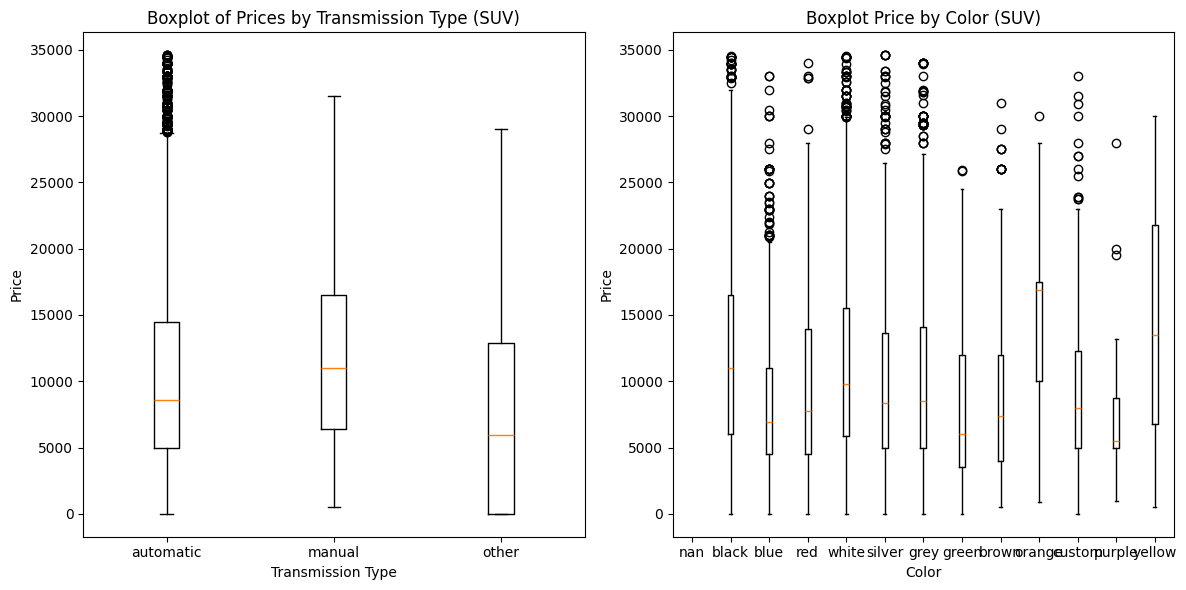

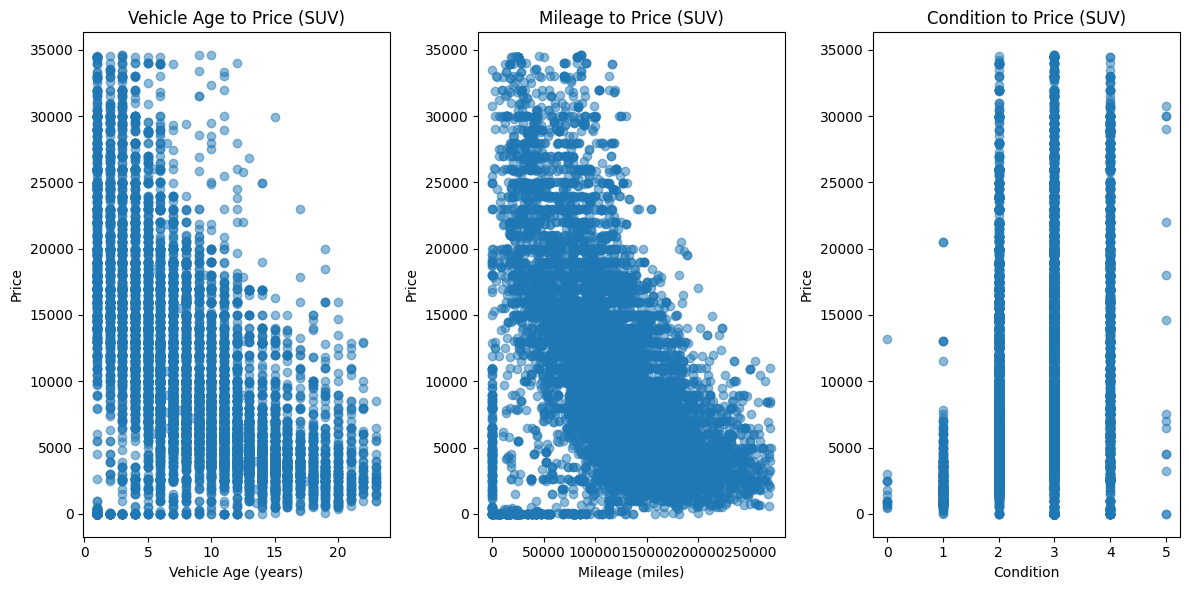

In [42]:
# Data for SUV vehicle type
suv_data = filtered_data[filtered_data['type'] == 'suv']

# Boxplot for transmission type and color against price
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for transmission_type in suv_data['transmission'].unique():
     data = suv_data[suv_data['transmission'] == transmission_type]['price']
     plt.boxplot(data, positions=[suv_data['transmission'].unique().tolist().index(transmission_type)])
plt.xticks(range(len(suv_data['transmission'].unique())), suv_data['transmission'].unique())
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.title('Boxplot of Prices by Transmission Type (SUV)')

plt.subplot(1, 2, 2)
for color in suv_data['paint_color'].unique():
     data = suv_data[suv_data['paint_color'] == color]['price']
     plt.boxplot(data, positions=[suv_data['paint_color'].unique().tolist().index(color)])
plt.xticks(range(len(suv_data['paint_color'].unique())), suv_data['paint_color'].unique())
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('Boxplot Price by Color (SUV)')

plt.tight_layout()
plt.show()

# Scatter plot for vehicle age, mileage, and condition against price
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(suv_data['vehicle_age_at_posting'], suv_data['price'], alpha=0.5)
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Price')
plt.title('Vehicle Age to Price (SUV)')

plt.subplot(1, 3, 2)
plt.scatter(suv_data['odometer'], suv_data['price'], alpha=0.5)
plt.xlabel('Mileage (miles)')
plt.ylabel('Price')
plt.title('Mileage to Price (SUV)')

plt.subplot(1, 3, 3)
plt.scatter(suv_data['condition'], suv_data['price'], alpha=0.5)
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Condition to Price (SUV)')

plt.tight_layout()
plt.show()

                        vehicle_age_at_posting  odometer  condition     price
vehicle_age_at_posting                1.000000  0.629041  -0.332579 -0.580784
odometer                              0.629041  1.000000  -0.340022 -0.523885
condition                            -0.332579 -0.340022   1.000000  0.262424
price                                -0.580784 -0.523885   0.262424  1.000000


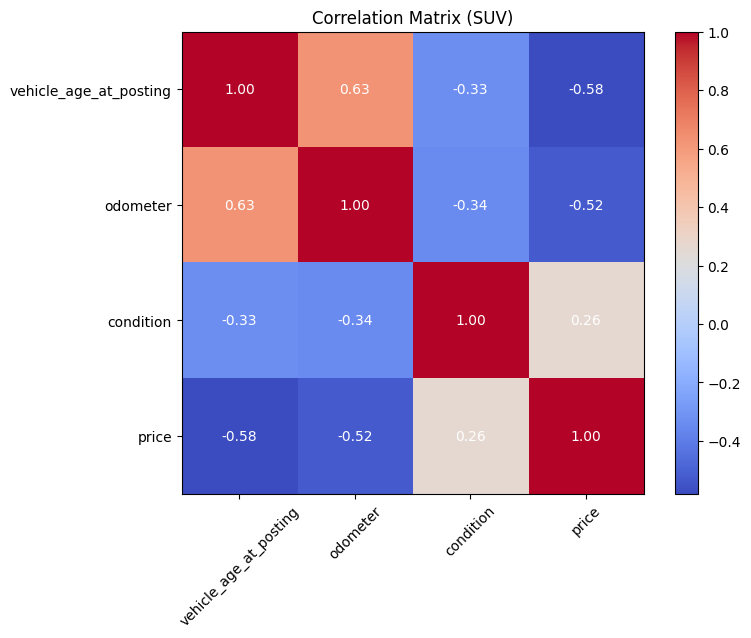

In [43]:
# Retrieve the required columns
suv_corr_data = suv_data[['vehicle_age_at_posting', 'odometer', 'condition', 'price']]

# Correlation Matrix
correlation_matrix = suv_corr_data.corr()
print(correlation_matrix)

# Correlation plot using heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Matrix (SUV)')
plt.colorbar()

# Add labels to the axes
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)

# Displays the correlation value on the heatmap
for i in range(len(correlation_matrix)):
     for j in range(len(correlation_matrix)):
         plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()

Based on the correlation matrix for SUV vehicle types, the following are the conclusions:

Vehicle Age:
There is a moderate negative correlation between vehicle age and price. This means that the older the vehicle, the lower the price tends to be.

Mileage (Odometer):
There is a moderate negative correlation between distance traveled and price. Vehicles with higher mileage tend to have lower prices.

Vehicle Condition (Condition):
There is a weak positive correlation between vehicle condition and price. This means that vehicles in better condition tend to have higher prices.


In terms of boxplots, yellow SUVs and manual transmission SUVs have typically higher prices in their respective categories

## General Conclusion

Value lost
'model_year': 4619 missing values
The solution is to replace the nan value with the median based on 'model' and 'condition'
    
'cylinders': 5260 missing values
'odometer': 7892 missing values
The solution is to replace the nan value with the median based on 'model_year' and 'condition'
    
'is_4wd': 25953 missing values
The solution is to replace the nan value with 0 and change the data type to boolean, so that no more values are lost
    
'paint_color': 9257 missing values
The solution is to leave it alone, because this column is categorical and there is no other data that we can use as a reference to fill in the data in this column.


Number of duplicates: 0

    
outliers 'price' = 34597.5 , 'odometer' = 270867.5 , 'vehicle_age_at_posting' = 24
   
We plot histograms for the original dataset and the filtered data. We saw that ads were generally between 19 and 50 days long, and ads longer than 100 days were very long. We took the two types of vehicles with the highest number of advertisements to create box plots, scatter plots and correlation matrices.
    
From this explanation, we conclude that the factor that most influences price is age, followed by distance traveled.

Ranking first in popularity for sedans, orange is a color that drives up prices in general, and automatic transmissions are more desirable than manual transmissions.
    
Ranked as the second most popular SUV, yellow is the color with the highest typical price, and manual transmissions outperform automatic transmissions in terms of price.